Q2
Suppose you have landed to a job and the first task you’ve assigned to prepare a report which
includes the following:
1. Player Count
o Total Number of Players
2. Purchasing Analysis (Total)
o Number of Unique Items
o Average Purchase Price
o Total Number of Purchases
o Total Revenue
3. Gender Demographics
o Percentage and Count of Male Players
o Percentage and Count of Female Players
o Percentage and Count of Other / Non-Disclosed
4. Purchasing Analysis (Gender)
o The below each broken by gender
 Purchase Count
 Average Purchase Price
 Total Purchase Value
 Average Purchase Total per Person by Gender
5. Age Demographics
o The below each broken into bins of 4 years (i.e. <10, 10-14, 15-19, etc.)
 Purchase Count
 Average Purchase Price
 Total Purchase Value
 Average Purchase Total per Person by Age Group
6. Top Spenders
o Identify the the top 5 spenders in the game by total purchase value, then list (in a
table):
 SN
 Purchase Count
 Average Purchase Price
 Total Purchase Value
7. Most Popular Items
o Identify the 5 most popular items by purchase count, then list (in a table):
 Item ID
 Item Name
 Purchase Count
 Item Price
 Total Purchase Value
8. Most Profitable Items
o the 5 most profitable items by total purchase value, then list (in a table):
 Item ID
 Item Name
 Purchase Count
 Item Price
 Total Purchase Value

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv("purchase_data.csv")
df.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


In [34]:
df.shape

(780, 7)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Purchase ID  780 non-null    int64  
 1   SN           780 non-null    object 
 2   Age          780 non-null    int64  
 3   Gender       780 non-null    object 
 4   Item ID      780 non-null    int64  
 5   Item Name    780 non-null    object 
 6   Price        780 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 42.8+ KB


In [36]:
print("Total number of players: ", df['SN'].count())

Total number of players:  780


In [37]:
print("Total number of unique items: ", df['Item Name'].nunique())
print("Average Purchase Price: ", df["Price"].mean())
print("Total number of purchases: ", df["Purchase ID"].count())
print("Total Revenue: ", df["Price"].sum())

Total number of unique items:  179
Average Purchase Price:  3.050987179487176
Total number of purchases:  780
Total Revenue:  2379.77


#### Gender Demographics

In [38]:
male_players_count = df["Gender"][df['Gender'] == 'Male'].count()
female_players_count = df["Gender"][df['Gender'] == 'Female'].count()
others_count = df["Gender"][(df['Gender'] != 'Male') & (df['Gender'] != 'Female')].count()
li=[female_players_count,male_players_count,others_count]
li


[113, 652, 15]

In [39]:
male_percentage = male_players_count/df["Gender"].count() * 100
female_percentage = female_players_count/df["Gender"].count() * 100
others_percentage = others_count/df["Gender"].count() * 100

In [40]:
print(f"Percentage and count of male players: {male_percentage}%, {male_players_count}")
print(f"Percentage and count of female players: {female_percentage}%, {female_players_count}")
print(f"Percentage and count of male players: {others_percentage}%, {others_count}")

Percentage and count of male players: 83.58974358974359%, 652
Percentage and count of female players: 14.487179487179489%, 113
Percentage and count of male players: 1.9230769230769231%, 15


#### Purchasing Analysis

In [41]:
df.groupby("Gender")["Purchase ID"].count()

Gender
Female                   113
Male                     652
Other / Non-Disclosed     15
Name: Purchase ID, dtype: int64

In [42]:
df.groupby("Gender")["Price"].mean()

Gender
Female                   3.203009
Male                     3.017853
Other / Non-Disclosed    3.346000
Name: Price, dtype: float64

In [43]:
df.groupby("Gender")["Price"].sum()

Gender
Female                    361.94
Male                     1967.64
Other / Non-Disclosed      50.19
Name: Price, dtype: float64

In [44]:
df2 = df.groupby("Gender")["Price"].sum().reset_index().copy()
df2

,Gender,Price
0,Female,361.94
1,Male,1967.64
2,Other / Non-Disclosed,50.19


In [45]:
df2["Gender Count"] = (df.groupby("Gender")["SN"].count().reset_index())["SN"]
df2

,Gender,Price,Gender Count
0,Female,361.94,113
1,Male,1967.64,652
2,Other / Non-Disclosed,50.19,15


In [46]:
df2["Avg Purchase"]=df2["Price"]/df2["Gender Count"]
df2

,Gender,Price,Gender Count,Avg Purchase
0,Female,361.94,113,3.203009
1,Male,1967.64,652,3.017853
2,Other / Non-Disclosed,50.19,15,3.346000


#### Age Demographics

In [47]:
bins = [0, 10, 15, 20, df["Age"].max()]
labels = ["0-10", "11-15", "16-20", "20+"]

In [48]:
df3 = df.copy()

df3["Age Group"] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_group = (df3.groupby('Age Group')["Purchase ID"].count().reset_index()).rename(columns = {"Purchase ID": "Purchase Count"})

age_group["Purchase Count"] = (df3.groupby('Age Group')["Purchase ID"].count().reset_index()).rename(columns = {"Purchase ID": "Purchase Count"})["Purchase Count"]

age_group["Avg Purchase Price"] = (df3.groupby('Age Group')["Price"].mean().reset_index())["Price"]

age_group["Total Purchase Value"] = (df3.groupby('Age Group')["Price"].sum().reset_index())["Price"]

age_group["Avg Purchase Total Per Person"] = age_group["Total Purchase Value"]/age_group["Purchase Count"]

age_group

,Age Group,Purchase Count,Avg Purchase Price,Total Purchase Value,Avg Purchase Total Per Person
0,0-10,23,3.353478,77.13,3.353478
1,11-15,28,2.956429,82.78,2.956429
2,16-20,136,3.035956,412.89,3.035956
3,20+,592,3.049443,1805.27,3.049443


#### Top Spenders

#### Q3. Fuel economy data are the result of vehicle testing done at the Environmental Protection Agency's National Vehicle and Fuel Emissions Laboratory in Ann Arbor, Michigan, and by vehicle manufacturers with oversight by EPA.

In [316]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [317]:
df = pd.read_csv("all_alpha_08.csv")
df2=pd.read_csv("all_alpha_18.csv")

##### Assessing the Data

##### Clean 'Cyl' data

In [318]:
# df["Cyl"] = df["Cyl"].str.replace('(', '')
# df["Cyl"] = df["Cyl"].str.replace(" cyl", '')
# df["Cyl"] = df["Cyl"].str.replace(")", '')

In [319]:
df["Cyl"].unique()

array(['(6 cyl)', '(4 cyl)', '(12 cyl)', '(8 cyl)', '(10 cyl)',
       '(16 cyl)', '(5 cyl)', nan, '(2 cyl)'], dtype=object)

In [320]:
df.dropna(inplace=True)

In [321]:
regex = r'\d{1,2}' 
df["Cyl"] = df["Cyl"].str.findall(regex).str.get(0)

In [322]:
df["Cyl"] = df["Cyl"].astype('int64')

##### Clean 'Drive' Data

In [323]:
df["Drive"].unique()

array(['4WD', '2WD'], dtype=object)

In [324]:
regex = r'\d{1,2}' 
df["Drive"] = df["Drive"].str.findall(regex).str.get(0)
df["Drive"] = df["Drive"].astype('int64')

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2205 non-null   object 
 1   Displ                 2205 non-null   float64
 2   Cyl                   2205 non-null   int64  
 3   Trans                 2205 non-null   object 
 4   Drive                 2205 non-null   int64  
 5   Fuel                  2205 non-null   object 
 6   Sales Area            2205 non-null   object 
 7   Stnd                  2205 non-null   object 
 8   Underhood ID          2205 non-null   object 
 9   Veh Class             2205 non-null   object 
 10  Air Pollution Score   2205 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

##### Clean 'Air Pollution Score'

In [326]:
# df["Air Pollution Score"] = df["Air Pollution Score"].astype('float64')
df["Air Pollution Score"].unique()

array(['7', '6', '9.5', '3', '7/7', '6/6', '3/3', '8', '9', '1', '6/4'],
      dtype=object)

In [327]:
df.head(3)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,6,Auto-S5,4,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,6,Auto-S5,4,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,4,Auto-S5,4,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no


<Axes: >

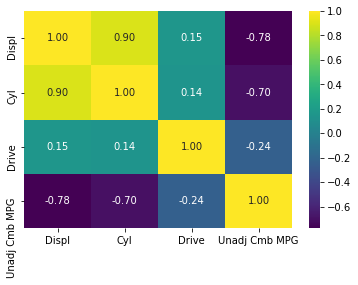

In [328]:
a=df.corr()
sns.heatmap(a,annot=True, fmt='.2f', cmap='viridis')

In [329]:
df.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,6,Auto-S5,4,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no


In [330]:
df

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,6,Auto-S5,4,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,6,Auto-S5,4,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,4,Auto-S5,4,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,4,Auto-S5,4,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,6,Auto-S5,4,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399,VOLVO XC 90,3.2,6,Auto-S6,4,Gasoline,CA,U2,8VVXB03.2U2N,SUV,7,Drv,14,20,16,20.7134,4,no
2400,VOLVO XC 90,4.4,8,Auto-S6,4,Gasoline,CA,U2,8VVXB04.4U2N,SUV,7,Drv,13,19,15,19.4789,3,no
2401,VOLVO XC 90,3.2,6,Auto-S6,2,Gasoline,FA,B5,8VVXB03.2U2N,SUV,6,Drv,14,20,16,20.9644,4,no
2402,VOLVO XC 90,3.2,6,Auto-S6,4,Gasoline,FA,B5,8VVXB03.2U2N,SUV,6,Drv,14,20,16,20.7134,4,no


In [331]:
df2

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606,VOLVO XC 90,2.0,4.0,SemiAuto-8,4WD,Gasoline,FA,T3B70,Federal Tier 3 Bin 70,JVVXJ02.0A70,standard SUV,5,22,28,24,5,No,365
1607,VOLVO XC 90,2.0,4.0,SemiAuto-8,4WD,Gasoline,CA,L3ULEV70,California LEV-III ULEV70,JVVXJ02.0B70,standard SUV,5,20,27,23,5,No,394
1608,VOLVO XC 90,2.0,4.0,SemiAuto-8,4WD,Gasoline,FA,T3B70,Federal Tier 3 Bin 70,JVVXJ02.0B70,standard SUV,5,20,27,23,5,No,394
1609,VOLVO XC 90,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,JVVXJ02.0P30,standard SUV,7,26/63,30/61,27/62,10,Elite,187


In [332]:
#q1
print(df2["Fuel"].unique()) 
print(df["Fuel"].unique())

['Gasoline' 'Gasoline/Electricity' 'Diesel' 'Ethanol/Gas' 'Electricity']
['Gasoline' 'ethanol/gas' 'ethanol' 'CNG' 'diesel']


df2.info()

In [333]:
#q2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1611 non-null   object 
 1   Displ                 1609 non-null   float64
 2   Cyl                   1609 non-null   float64
 3   Trans                 1611 non-null   object 
 4   Drive                 1611 non-null   object 
 5   Fuel                  1611 non-null   object 
 6   Cert Region           1611 non-null   object 
 7   Stnd                  1611 non-null   object 
 8   Stnd Description      1611 non-null   object 
 9   Underhood ID          1611 non-null   object 
 10  Veh Class             1611 non-null   object 
 11  Air Pollution Score   1611 non-null   int64  
 12  City MPG              1611 non-null   object 
 13  Hwy MPG               1611 non-null   object 
 14  Cmb MPG               1611 non-null   object 
 15  Greenhouse Gas Score 

In [334]:
df=df[~(df["Cmb MPG"].str.contains("/")==True)]
df2=df2[~(df2["Cmb MPG"].str.contains("/")==True)]

In [335]:
df["Cmb MPG"]=df["Cmb MPG"].astype("float64")
df2["Cmb MPG"]=df2["Cmb MPG"].astype("float64")

<ipython-input-335-ef51580f6d86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cmb MPG"]=df["Cmb MPG"].astype("float64")
<ipython-input-335-ef51580f6d86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Cmb MPG"]=df2["Cmb MPG"].astype("float64")


In [342]:
a=df.groupby("Fuel")["Cmb MPG"].mean().reset_index()
b=df2.groupby("Fuel")["Cmb MPG"].mean().reset_index()

In [343]:
a

,Fuel,Cmb MPG
0,CNG,28.000000
1,Gasoline,19.592297
2,diesel,20.571429
3,ethanol,13.000000


In [344]:
b

,Fuel,Cmb MPG
0,Diesel,30.736842
1,Electricity,108.000000
2,Gasoline,23.370643


In [370]:
ap=df.groupby("SmartWay")["Fuel"].count().reset_index()
ap.rename(columns={"Fuel":"Count"},inplace=True)
ap

,SmartWay,Count
0,no,1501
1,yes,638


In [371]:
ap1=df2.groupby("SmartWay")["Fuel"].count().reset_index()
ap1.rename(columns={"Fuel":"Count"},inplace=True)
ap1

,SmartWay,Count
0,Elite,8
1,No,1357
2,Yes,167


In [372]:
df=pd.read_csv("clean_08.csv")
df2=pd.read_csv("clean_18.csv")

In [373]:
df

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,VOLVO XC 90,3.2,6,Auto-S6,2WD,Gasoline,SUV,7.0,14.0,20.0,16.0,4,no
983,VOLVO XC 90,3.2,6,Auto-S6,4WD,Gasoline,SUV,7.0,14.0,20.0,16.0,4,no
984,VOLVO XC 90,4.4,8,Auto-S6,4WD,Gasoline,SUV,7.0,13.0,19.0,15.0,3,no
985,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6.0,13.0,19.0,15.0,7,no


In [374]:
ap=df.corr()
ap

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
displ,1.000000,0.899304,-0.289993,-0.790440,-0.801678,-0.818799,-0.847613
cyl,0.899304,1.000000,-0.270417,-0.756304,-0.733064,-0.770538,-0.820940
air_pollution_score,-0.289993,-0.270417,1.000000,0.432434,0.400708,0.425784,0.388444
city_mpg,-0.790440,-0.756304,0.432434,1.000000,0.902942,0.980891,0.910693
hwy_mpg,-0.801678,-0.733064,0.400708,0.902942,1.000000,0.960533,0.931744
cmb_mpg,-0.818799,-0.770538,0.425784,0.980891,0.960533,1.000000,0.947607
greenhouse_gas_score,-0.847613,-0.820940,0.388444,0.910693,0.931744,0.947607,1.000000


<Axes: >

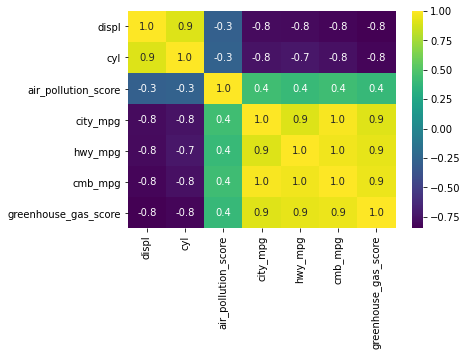

In [381]:
sns.heatmap(ap,annot=True, fmt='.1f', cmap='viridis')

In [385]:
s=df[["model","cmb_mpg"]]

In [386]:
a=df2[["model","cmb_mpg"]]

In [387]:
s

,model,cmb_mpg
0,ACURA MDX,17.0
1,ACURA RDX,19.0
2,ACURA RL,19.0
3,ACURA TL,21.0
4,ACURA TL,20.0
...,...,...
982,VOLVO XC 90,16.0
983,VOLVO XC 90,16.0
984,VOLVO XC 90,15.0
985,MERCEDES-BENZ C300,15.0


In [389]:
a.rename(columns={
    "cmb_mpg":"cm"
},inplace=True)
a

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,model,cm
0,ACURA RDX,23.0
1,ACURA RDX,22.0
2,ACURA TLX,27.0
3,ACURA TLX,24.0
4,ACURA TLX,24.0
...,...,...
827,TOYOTA Sequoia FFV,14.0
828,TOYOTA Tundra FFV,15.0
829,VOLVO S90,71.0
830,VOLVO XC 60,59.0


In [396]:
df3=pd.merge(a,s,on="model",how="inner")
df3

,model,cm,cmb_mpg
0,ACURA RDX,23.0,19.0
1,ACURA RDX,22.0,19.0
2,AUDI A3,27.0,24.0
3,AUDI A3,27.0,25.0
4,AUDI A3,27.0,21.0
...,...,...,...
917,VOLVO XC 90,27.0,16.0
918,VOLVO XC 90,27.0,15.0
919,VOLVO XC 90,62.0,16.0
920,VOLVO XC 90,62.0,16.0


In [394]:
df3["Difference"]=abs(df3["cm"]-df3["cmb_mpg"])

In [395]:
df3

,model,cm,cmb_mpg,Difference
0,ACURA RDX,23.0,19.0,4.0
1,ACURA RDX,22.0,19.0,3.0
2,AUDI A3,27.0,24.0,3.0
3,AUDI A3,27.0,25.0,2.0
4,AUDI A3,27.0,21.0,6.0
...,...,...,...,...
917,VOLVO XC 90,27.0,16.0,11.0
918,VOLVO XC 90,27.0,15.0,12.0
919,VOLVO XC 90,62.0,16.0,46.0
920,VOLVO XC 90,62.0,16.0,46.0


In [49]:
df2009=pd.read_csv("LS2009Candidate.csv")
dfe2009=pd.read_csv("LS2009Electors.csv")
df2014=pd.read_csv("LS2014Candidate.csv")
dfe2014=pd.read_csv("LS2014Electors.csv")
UPA = ['INC', 'NCP', 'RJD', 'DMK', 'IUML', 'JMM', 'JD(S)', 'KC(M)', 'RLD', 'RSP', 'CMP(J)', 'KC(J)', 'PPI', 'MD']
NDA = ['BJP', 'SS', 'LJP', 'SAD', 'RLSP', 'AD', 'PMK', 'NPP', 'AINRC', 'NPF', 'RPI(A)', 'BPF', 'JD(U)', 'SDF', 'NDPP', 'MNF', 'RIDALOS', 'KMDK', 'IJK', 'PNK', 'JSP', 'GJM', 'MGP', 'GFP', 'GVP', 'AJSU', 'IPFT', 'MPP', 'KPP', 'JKPC', 'KC(T)', 'BDJS', 'AGP', 'JSS', 'PPA', 'UDP', 'HSPDP', 'PSP', 'JRS', 'KVC', 'PNP', 'SBSP', 'KC(N)', 'PDF', 'MDPF']
Others = ['YSRCP', 'AAAP', 'IND', 'AIUDF', 'BLSP', 'JKPDP', 'JD(S)', 'INLD', 'CPI', 'AIMIM', 'KEC(M)', 'SWP', 'NPEP', 'JKN', 'AIFB', 'MUL', 'AUDF', 'BOPF', 'BVA', 'HJCBL', 'JVM', 'MDMK']

def categorize_party(party):
    if party in UPA:
        return 'UPA'
    elif party in NDA:
        return 'NDA'
    else:
        return 'Others'

In [50]:
df2009["Alliances"]=df2009["Party Abbreviation"].apply(categorize_party)

In [51]:
df2014["Alliances"]=df2014["Party Abbreviation"].apply(categorize_party)

In [52]:
a = df2009[df2009["Position"]==1].groupby("Alliances")["Position"].count().reset_index()
a

,Alliances,Position
0,NDA,143
1,Others,150
2,UPA,248


In [53]:
b = df2014[df2014["Position"]==1].groupby("Alliances")["Position"].count().reset_index()
b

,Alliances,Position
0,NDA,300
1,Others,182
2,UPA,61


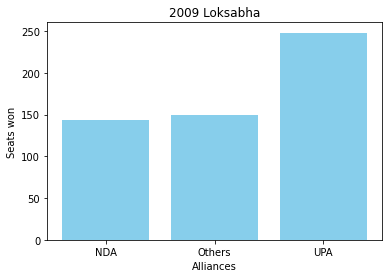

In [54]:
plt.bar(a["Alliances"],a["Position"],color="skyblue")
plt.title("2009 Loksabha")
plt.ylabel("Seats won")
plt.xlabel("Alliances")
plt.show()

Text(0.5, 0, 'Alliances')

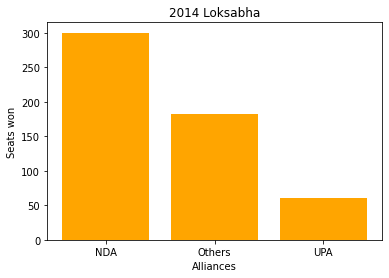

In [55]:
plt.bar(b["Alliances"], b["Position"],color="Orange")
plt.title("2014 Loksabha")
plt.ylabel("Seats won")
plt.xlabel("Alliances")

In [56]:
df2009[df2009["Position"]==1].groupby("Party Abbreviation")["Position"].count()

Party Abbreviation
ADMK        9
AGP         1
AIFB        2
AIMIM       1
AITC       19
AUDF        1
BJD        14
BJP       116
BOPF        1
BSP        21
BVA         1
CPI         4
CPM        16
DMK        17
HJCBL       1
INC       206
IND         9
JD(S)       3
JD(U)      20
JKN         3
JMM         2
JVM         1
KEC(M)      1
MDMK        1
MUL         2
NCP         9
NPF         1
RJD         4
RLD         5
RSP         2
SAD         4
SDF         1
SHS        11
SP         23
SWP         1
TDP         6
TRS         2
Name: Position, dtype: int64

In [57]:
df2014[df2014["Position"]==1].groupby("Party Abbreviation")["Position"].count()

Party Abbreviation
AAAP        4
AD          2
ADMK       37
AIMIM       1
AINRC       1
AITC       34
AIUDF       3
BJD        20
BJP       282
BLSP        3
CPI         1
CPM         9
INC        44
IND         3
INLD        2
IUML        2
JD(S)       2
JD(U)       2
JKPDP       3
JMM         2
KEC(M)      1
LJP         6
NCP         6
NPEP        1
NPF         1
PMK         1
RJD         4
RSP         1
SAD         4
SDF         1
SHS        18
SP          5
SWP         1
TDP        16
TRS        11
YSRCP       9
Name: Position, dtype: int64

In [58]:
c=df2009[df2009["Position"]==1].groupby("Candidate Category")["Candidate Name"].count().reset_index()
c.rename(columns={
    "Candidate Name": "Seats_Won"
}, inplace=True)
c


,Candidate Category,Seats_Won
0,GEN,403
1,SC,85
2,ST,53


In [59]:
d=df2014[df2014["Position"]==1].groupby("Candidate Category")["Candidate Name"].count().reset_index()
d.rename(columns={
    "Candidate Name": "Seats_Won"
}, inplace=True)
d

,Candidate Category,Seats_Won
0,GEN,405
1,SC,85
2,ST,53


Text(0.5, 0, 'Category')

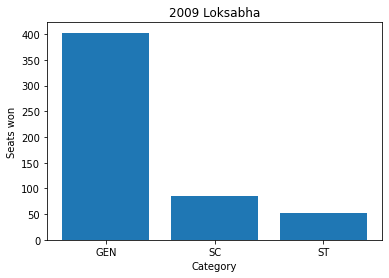

In [60]:
plt.bar(c["Candidate Category"],c["Seats_Won"])
plt.title("2009 Loksabha")
plt.ylabel("Seats won")
plt.xlabel("Category")

Text(0.5, 0, 'Category')

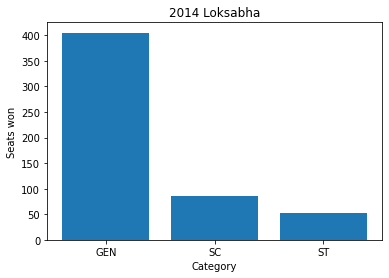

In [61]:
plt.bar(d["Candidate Category"],d["Seats_Won"])
plt.title("2014 Loksabha")
plt.ylabel("Seats won")
plt.xlabel("Category")


In [62]:
c1=df2009[df2009["Position"]==1]
d1=df2014[df2014["Position"]==1]
c1

,ST_CODE,State name,Month,Year,PC Number,PC name,PC Type,Candidate Name,Candidate Sex,Candidate Category,Candidate Age,Party Abbreviation,Total Votes Polled,Position,Alliances
0,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD RAMESH,M,ST,43.0,TDP,372268.0,1.0,Others
9,S01,Andhra Pradesh,3,2009,2,Peddapalle,SC,DR.G.VIVEKANAND,M,SC,51.0,INC,313748.0,1.0,UPA
24,S01,Andhra Pradesh,3,2009,3,Karimnagar,GEN,PONNAM PRABHAKAR,M,GEN,41.0,INC,317927.0,1.0,UPA
39,S01,Andhra Pradesh,3,2009,4,Nizamabad,GEN,MADHU YASKHI GOUD,M,GEN,50.0,INC,296504.0,1.0,UPA
51,S01,Andhra Pradesh,3,2009,5,Zahirabad,GEN,SURESH KUMAR SHETKAR,M,GEN,46.0,INC,395767.0,1.0,UPA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7992,U05,NCT OF Delhi,3,2009,5,NORTH WEST DELHI,SC,KRISHNA TIRATH,F,SC,54.0,INC,487404.0,1.0,UPA
8008,U05,NCT OF Delhi,3,2009,6,WEST DELHI,GEN,MAHABAL MISHRA,M,GEN,54.0,INC,479899.0,1.0,UPA
8023,U05,NCT OF Delhi,3,2009,7,SOUTH DELHI,GEN,RAMESH KUMAR,M,GEN,53.0,INC,360278.0,1.0,UPA
8038,U06,Lakshadweep,3,2009,1,Lakshadweep,ST,HAMDULLAH SAYEED,M,ST,26.0,INC,20492.0,1.0,UPA


<Axes: ylabel='Frequency'>

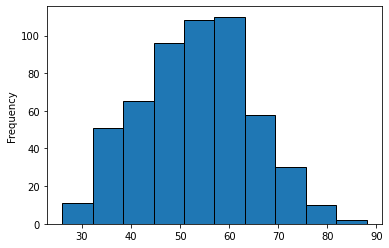

In [63]:
# plt.scatter(c1["Candidate Age"],c1["Candidate Name"],color="skyblue")
# plt.scatter(d1["Candidate Age"],c1["Candidate Name"],color="red")
c1["Candidate Age"].plot(kind="hist",edgecolor="black")


Text(0.5, 1.0, 'Candidate winning  in 2009')

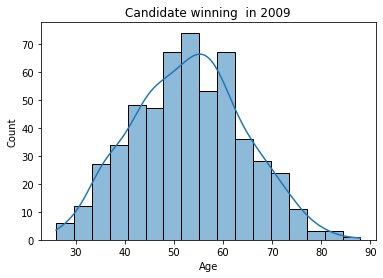

In [64]:
ax=sns.histplot(data=c1,x="Candidate Age",kde=True)
ax.set_xlabel("Age")
ax.set_ylabel("Count")
ax.set_title("Candidate winning  in 2009")

In [65]:
from scipy.stats import shapiro
import scipy.stats as stats

In [66]:
stats.shapiro(c1["Candidate Age"])

ShapiroResult(statistic=0.9948411583900452, pvalue=0.06665270775556564)

Text(0.5, 1.0, 'Candidate winning  in 2014')

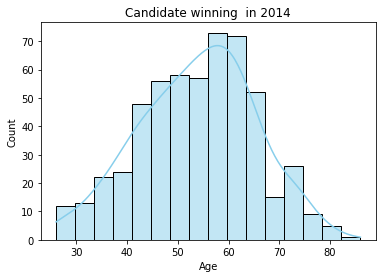

In [67]:
ax=sns.histplot(data=d1,x="Candidate Age",kde=True,color="skyblue")
ax.set_xlabel("Age")
ax.set_ylabel("Count")
ax.set_title("Candidate winning  in 2014")

In [68]:
c2=df2009[df2009["Alliances"]=="NDA"]
d2=df2009[df2009["Alliances"]=="UPA"]

Text(0.5, 1.0, 'UPA Candidate')

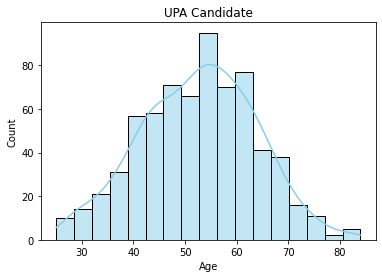

In [69]:
ax=sns.histplot(data=d2,x="Candidate Age",kde=True,color="skyblue")
ax.set_xlabel("Age")
ax.set_ylabel("Count")
ax.set_title("UPA Candidate")

Text(0.5, 1.0, 'NDA Candidate')

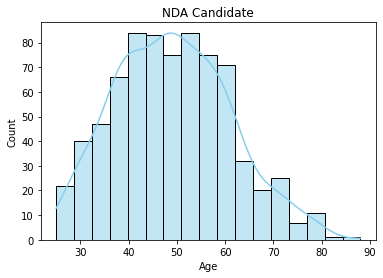

In [70]:
ax=sns.histplot(data=c2,x="Candidate Age",kde=True,color="skyblue")
ax.set_xlabel("Age")
ax.set_ylabel("Count")
ax.set_title("NDA Candidate")

Text(0, 0.5, 'Participant')

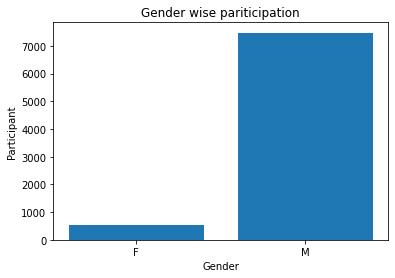

In [71]:
d3=df2009.groupby("Candidate Sex")["Year"].count().reset_index()
d3.rename(columns={"Year":"Participant"},inplace=True)
plt.bar(d3["Candidate Sex"],d3["Participant"])
plt.title("Gender wise pariticipation")
plt.xlabel("Gender")
plt.ylabel("Participant")

Text(0, 0.5, 'Paricipant')

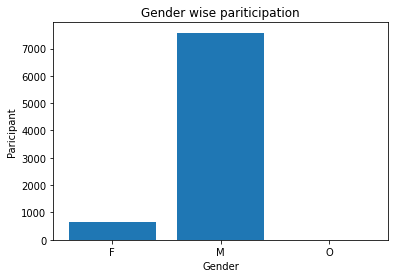

In [72]:
c3=df2014.groupby("Candidate Sex")["Year"].count().reset_index()
c3.rename(columns={"Year":"Participant"},inplace=True)
plt.bar(c3["Candidate Sex"],c3["Participant"])
plt.title("Gender wise pariticipation")
plt.xlabel("Gender")
plt.ylabel("Paricipant")

In [73]:
c4=df2014[df2014["Alliances"]=="NDA"]

Text(0, 0.5, 'Count')

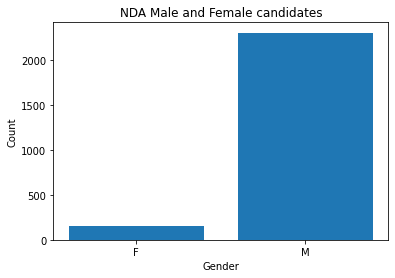

In [74]:
c4=c4.groupby("Candidate Sex")["Position"].sum().reset_index()

plt.bar(c4["Candidate Sex"],c4["Position"])
plt.title("NDA Male and Female candidates")
plt.xlabel("Gender")
plt.ylabel("Count")




Text(0, 0.5, 'Count')

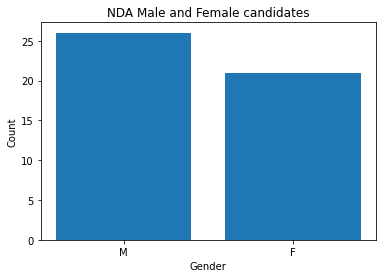

In [75]:
c4=df2009[df2009["Alliances"]=="NDA"]
plt.bar(c4["Candidate Sex"],c4["Position"])
plt.title("NDA Male and Female candidates")
plt.xlabel("Gender")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

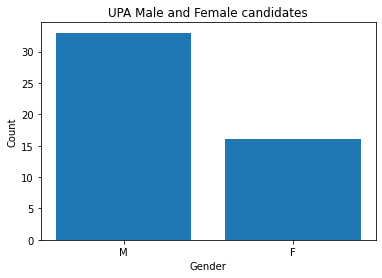

In [76]:
c4=df2009[df2009["Alliances"]=="UPA"]
plt.bar(c4["Candidate Sex"],c4["Position"])
plt.title("UPA Male and Female candidates")
plt.xlabel("Gender")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

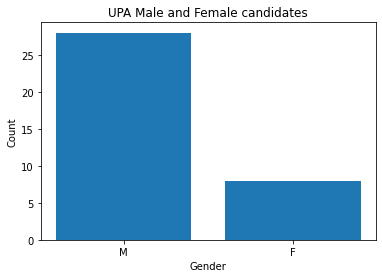

In [77]:
c4=df2014[df2014["Alliances"]=="UPA"]
plt.bar(c4["Candidate Sex"],c4["Position"])
plt.title("UPA Male and Female candidates")
plt.xlabel("Gender")
plt.ylabel("Count")

In [78]:
a=dfe2009.groupby("STATE")["POLL PERCENTAGE"].mean().reset_index()
a

,STATE,POLL PERCENTAGE
0,Andaman & Nicobar Islands,64.160000
1,Andhra Pradesh,73.351429
2,Arunachal Pradesh,68.650000
3,Assam,69.498571
4,Bihar,44.732500
5,Chandigarh,65.510000
6,Chattisgarh,55.390909
7,Dadra & Nagar Haveli,73.230000
8,Daman & Diu,71.320000
9,Goa,55.505000


In [79]:
b=dfe2014.groupby("STATE")["POLL PERCENTAGE"].mean().reset_index()
b

,STATE,POLL PERCENTAGE
0,Andaman & Nicobar Islands,70.670000
1,Andhra Pradesh,75.816190
2,Arunachal Pradesh,79.880000
3,Assam,79.801429
4,Bihar,56.487500
5,Chandigarh,73.710000
6,Chhattisgarh,69.520909
7,Dadra & Nagar Haveli,84.090000
8,Daman & Diu,78.010000
9,Goa,77.110000


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, 'Andaman & Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chattisgarh'),
  Text(7, 0, 'Dadra & Nagar Haveli'),
  Text(8, 0, 'Daman & Diu'),
  Text(9, 0, 'Goa'),
  Text(10, 0, 'Gujarat'),
  Text(11, 0, 'Haryana'),
  Text(12, 0, 'Himachal Pradesh'),
  Text(13, 0, 'Jammu & Kashmir'),
  Text(14, 0, 'Jharkhand'),
  Text(15, 0, 'Karnataka'),
  Text(16, 0, 'Kerala'),
  Text(17, 0, 'Lakshadweep'),
  Text(18, 0, 'Madhya Pradesh'),
  Text(19, 0, 'Maharashtra'),
  Text(20, 0, 'Manipur'),
  Text(21, 0, 'Meghalaya'),
  Text(22, 0, 'Mizoram'),
  Text(23, 0, 'NCT OF Delhi'),
  Text(24, 0, 'Nagaland'),
  Text(25, 0, 'Orissa'),
  Text(26, 0, 'Puducherry'),
  Text(27, 

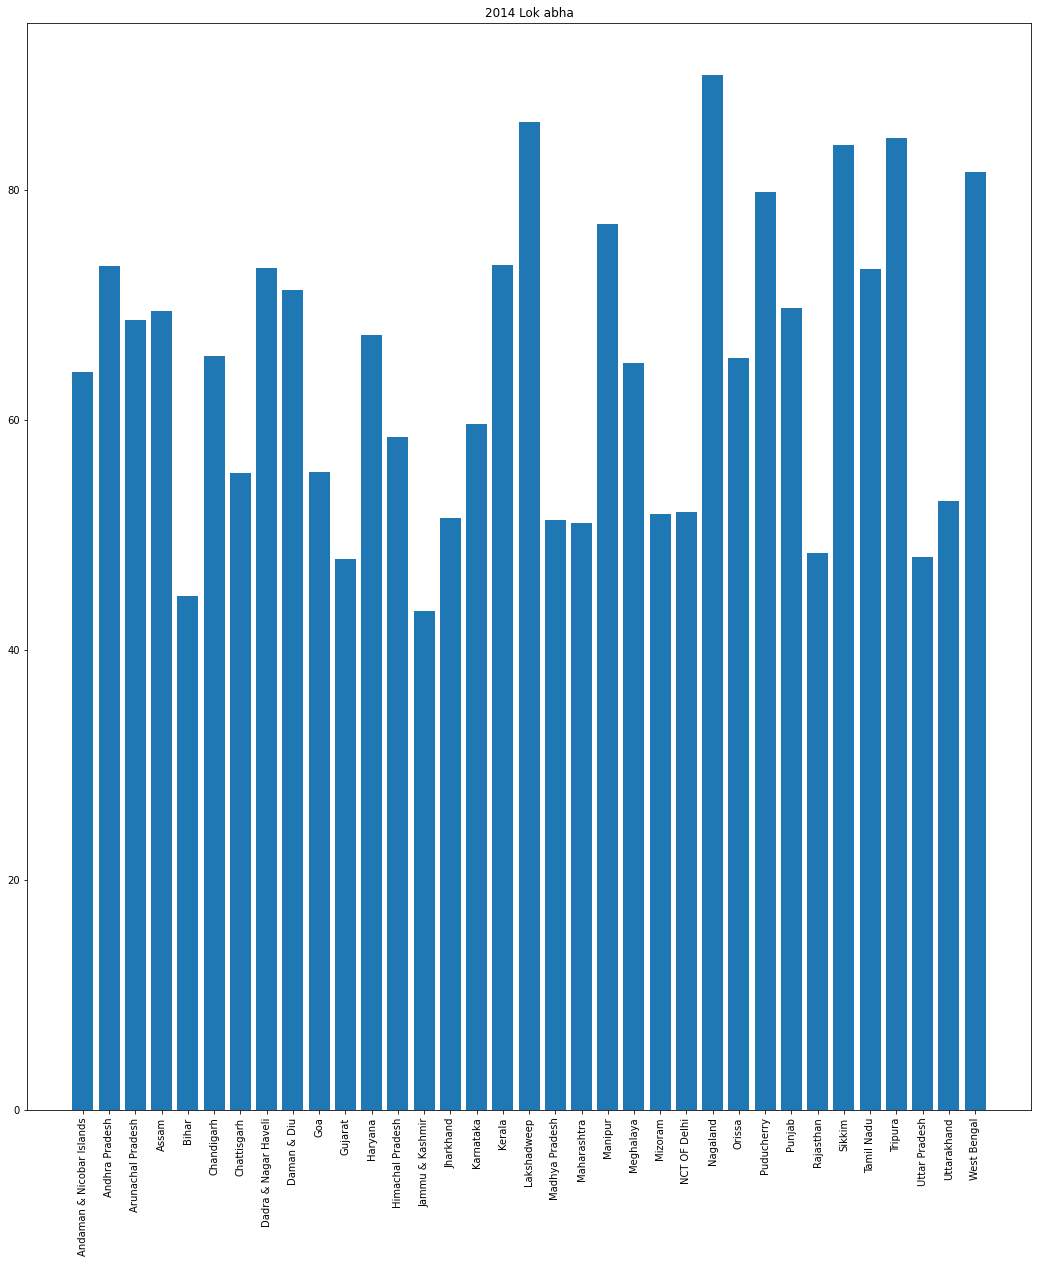

In [80]:
plt.figure(figsize=(18,20))
plt.bar(a["STATE"],a["POLL PERCENTAGE"])
plt.title("2014 Lok abha")
plt.xticks(rotation=90)